In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [312]:
input_file = "C:/Users/prc0549/Documents/MS Analytics/ANLY 699/Data project/Datafinal.csv" 
finaldata = pd.read_csv(input_file)

In [313]:
#Checking the data load
finaldata.head(4)

,latround,lonround,FIRE_SIZE,STAT_CAUSE_DESCR,STATE,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI,Size_bin,FIREMONTH,FIREDOW
0,25.5,-80.67,20.0,Children,FL,85.16220,281.0507,27.03898,17.95706,62.53465,26.94340,0.108983,8.376362,10.0-99.9,Jan,Friday
1,25.5,-80.67,5.0,Missing/Undefined,FL,85.20996,283.2627,27.97254,13.93316,58.49655,20.52926,0.000000,6.103125,0.26-9.9,Jan,Saturday
2,25.5,-80.67,1.0,Equipment Use,FL,85.82980,289.5184,30.33135,23.05233,61.22300,16.61895,0.000000,5.462952,0.26-9.9,Jan,Monday
3,25.5,-80.67,0.4,Missing/Undefined,FL,86.03359,293.6162,31.78532,24.41006,61.90777,24.70461,0.023437,8.448637,0.26-9.9,Jan,Tuesday


In [314]:
#Describing the dataset to see the data types and variables
finaldata.describe()

,latround,lonround,FIRE_SIZE,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI
count,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,9.426300e+04,9.426300e+04
mean,36.238227,-95.986424,100.037091,88.495085,299.530246,76.840284,25.407976,37.820333,10.986897,7.750812e-01,9.976701e+00
std,5.471606,14.184135,2977.660201,9.227274,312.857524,105.865439,7.866449,18.402139,7.131908,2.832254e+00,9.148738e+00
min,25.500000,-124.670000,0.000200,3.760347,0.195785,0.019820,1.873193,0.685971,0.052316,-1.247548e-14,4.513861e-08
25%,32.000000,-107.330000,0.200000,86.576370,51.734310,18.241415,19.385580,23.755875,5.910426,0.000000e+00,4.358532e+00
50%,34.500000,-94.000000,1.000000,90.079610,210.646300,39.734500,25.552550,35.612110,9.286214,0.000000e+00,7.315162e+00
75%,40.500000,-84.000000,5.000000,93.894375,451.766700,89.847340,31.479970,49.331080,14.200800,2.155044e-01,1.299556e+01
max,49.000000,-67.330000,479549.000000,100.552000,2799.314000,1189.231000,49.666740,99.084690,53.923800,1.021282e+02,1.080923e+02


In [315]:
#
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94263 entries, 0 to 94262
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latround          94263 non-null  float64
 1   lonround          94263 non-null  float64
 2   FIRE_SIZE         94263 non-null  float64
 3   STAT_CAUSE_DESCR  94263 non-null  object 
 4   STATE             94263 non-null  object 
 5   C_FFMC            94263 non-null  float64
 6   C_DC              94263 non-null  float64
 7   C_DMC             94263 non-null  float64
 8   M_t               94263 non-null  float64
 9   M_rh              94263 non-null  float64
 10  M_wdSpd           94263 non-null  float64
 11  C_prec            94263 non-null  float64
 12  C_ISI             94263 non-null  float64
 13  Size_bin          94263 non-null  object 
 14  FIREMONTH         94263 non-null  object 
 15  FIREDOW           94263 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [316]:
firedata = finaldata
firedata=firedata.drop(['STATE'], axis=1)
firedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94263 entries, 0 to 94262
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latround          94263 non-null  float64
 1   lonround          94263 non-null  float64
 2   FIRE_SIZE         94263 non-null  float64
 3   STAT_CAUSE_DESCR  94263 non-null  object 
 4   C_FFMC            94263 non-null  float64
 5   C_DC              94263 non-null  float64
 6   C_DMC             94263 non-null  float64
 7   M_t               94263 non-null  float64
 8   M_rh              94263 non-null  float64
 9   M_wdSpd           94263 non-null  float64
 10  C_prec            94263 non-null  float64
 11  C_ISI             94263 non-null  float64
 12  Size_bin          94263 non-null  object 
 13  FIREMONTH         94263 non-null  object 
 14  FIREDOW           94263 non-null  object 
dtypes: float64(11), object(4)
memory usage: 10.8+ MB


In [317]:
#Label encoding of categorical variables
cols = ['STAT_CAUSE_DESCR', 'Size_bin', 'FIREMONTH','FIREDOW']
for col in cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(firedata[col].values.astype('str')))
    firedata[col] = lbl.transform(list(firedata[col].values.astype('str')))

In [318]:
firedata.head()

,latround,lonround,FIRE_SIZE,STAT_CAUSE_DESCR,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI,Size_bin,FIREMONTH,FIREDOW
0,25.5,-80.67,20.0,2,85.16220,281.0507,27.03898,17.95706,62.53465,26.94340,0.108983,8.376362,2,4,0
1,25.5,-80.67,5.0,8,85.20996,283.2627,27.97254,13.93316,58.49655,20.52926,0.000000,6.103125,1,4,2
2,25.5,-80.67,1.0,4,85.82980,289.5184,30.33135,23.05233,61.22300,16.61895,0.000000,5.462952,1,4,1
3,25.5,-80.67,0.4,8,86.03359,293.6162,31.78532,24.41006,61.90777,24.70461,0.023437,8.448637,1,4,5
4,25.5,-80.67,0.3,8,86.08164,297.8394,32.97161,25.10641,69.74634,10.32157,0.055903,4.120590,1,4,6


In [319]:
target = firedata['Size_bin']

In [321]:
target.value_counts()

1    48811
0    27903
2    13724
3     2001
4     1824
Name: Size_bin, dtype: int64

In [322]:
firedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94263 entries, 0 to 94262
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latround          94263 non-null  float64
 1   lonround          94263 non-null  float64
 2   FIRE_SIZE         94263 non-null  float64
 3   STAT_CAUSE_DESCR  94263 non-null  int64  
 4   C_FFMC            94263 non-null  float64
 5   C_DC              94263 non-null  float64
 6   C_DMC             94263 non-null  float64
 7   M_t               94263 non-null  float64
 8   M_rh              94263 non-null  float64
 9   M_wdSpd           94263 non-null  float64
 10  C_prec            94263 non-null  float64
 11  C_ISI             94263 non-null  float64
 12  Size_bin          94263 non-null  int64  
 13  FIREMONTH         94263 non-null  int64  
 14  FIREDOW           94263 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 10.8 MB


In [323]:
numeric = ['C_FFMC', 'C_DMC', 'C_DC', 'M_t', 'M_rh',  'M_wdSpd','C_prec','C_ISI']  
scaler = StandardScaler()
x = firedata[numeric].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=numeric, index = firedata.index)
firedata[numeric] = df_temp

In [324]:
firedata.describe()

,latround,lonround,FIRE_SIZE,STAT_CAUSE_DESCR,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI,Size_bin,FIREMONTH,FIREDOW
count,94263.000000,94263.000000,94263.000000,94263.000000,9.426300e+04,9.426300e+04,9.426300e+04,9.426300e+04,9.426300e+04,9.426300e+04,9.426300e+04,9.426300e+04,94263.000000,94263.000000,94263.000000
mean,36.238227,-95.986424,100.037091,4.322587,-6.265482e-16,-1.471393e-16,-1.827181e-16,3.618180e-18,-1.977938e-16,1.097515e-16,-4.884543e-17,1.869393e-16,0.950086,4.829806,3.025164
std,5.471606,14.184135,2977.660201,2.815052,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.835574,3.216038,1.999916
min,25.500000,-124.670000,0.000200,0.000000,-9.183123e+00,-9.567807e-01,-7.256464e-01,-2.991808e+00,-2.017948e+00,-1.533200e+00,-2.736638e-01,-1.090506e+00,0.000000,0.000000,0.000000
25%,32.000000,-107.330000,0.200000,3.000000,-2.079406e-01,-7.920450e-01,-5.535251e-01,-7.655840e-01,-7.642879e-01,-7.118008e-01,-2.736638e-01,-6.140955e-01,0.000000,1.000000,1.000000
50%,34.500000,-94.000000,1.000000,4.000000,1.717228e-01,-2.841051e-01,-3.505014e-01,1.837868e-02,-1.199988e-01,-2.384624e-01,-2.736638e-01,-2.909203e-01,1.000000,5.000000,3.000000
75%,40.500000,-84.000000,5.000000,7.000000,5.851478e-01,4.866025e-01,1.228647e-01,7.718891e-01,6.255147e-01,4.506396e-01,-1.975741e-01,3.299772e-01,1.000000,7.000000,5.000000
max,49.000000,-67.330000,479549.000000,12.000000,1.306668e+00,7.990209e+00,1.050765e+01,3.083843e+00,3.329215e+00,6.020427e+00,3.578552e+01,1.072455e+01,4.000000,11.000000,6.000000


In [325]:
#Using method 2 to split the data
from sklearn.model_selection import train_test_split
y = target
X = firedata.drop(['Size_bin','FIRE_SIZE'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

In [326]:
#Training the model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [327]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict=model.predict(X_test)
confusion_matrix(y_test,y_predict)
accuracy_score(y_test, y_predict)*100

53.97291276212031

In [330]:
#Implement cross validation
from sklearn.model_selection import cross_val_score
scores1  = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
y_predict = cross_val_predict(model, X_train, y_train, cv=3)

print(scores1)
print("\nAccuracy: %0.2f (std %0.2f)" % (scores1.mean(), scores1.std()))

CM = confusion_matrix(y_train, y_predict)
print("Confusion Matrix: \n")
print(CM)

[0.53841491 0.53371723 0.53538415 0.53659645 0.52697787 0.54486208
 0.53167627 0.5369809  0.53804183 0.55107608]

Accuracy: 0.54 (std 0.01)
Confusion Matrix: 

[[11452  6505  1116   195   249]
 [ 7498 20538  5039   615   428]
 [ 1260  5441  2457   308   218]
 [  219   661   325   126    72]
 [  273   451   248   104   186]]


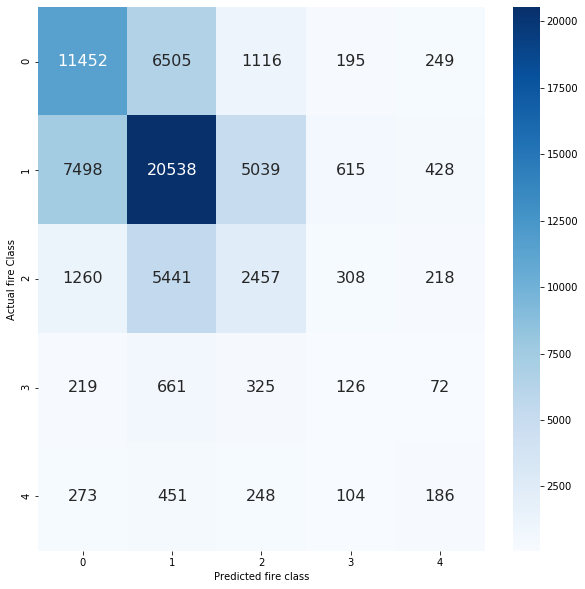

In [331]:
# Visualize it as a heatmap
fig, ax = plt.subplots(figsize=(10,10))
akws = {"ha": 'center',"va": 'center', "size": 16}
sn.heatmap(CM, fmt='', cmap=plt.cm.Blues, annot=True,annot_kws=akws, ax=ax,) 
plt.xlabel('Predicted fire class')
plt.ylabel('Actual fire Class')
plt.show()

In [332]:
# Part 2 Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[ 5247  2937   155    24    23]
 [ 2508 11023  1020    67    75]
 [  350  2879   692    58    61]
 [   87   329   106    34    42]
 [  136   245    57    36    88]]
60.412320096184445


In [333]:
#Calculating the feature importance in Python
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
lonround,0.125423
latround,0.102817
C_DC,0.092689
C_DMC,0.088803
M_t,0.084671
M_wdSpd,0.083765
M_rh,0.083241
C_ISI,0.082656
C_FFMC,0.079941
STAT_CAUSE_DESCR,0.064699


In [334]:
scoresrf    = cross_val_score(clf, X_train, y_train, cv=6, scoring="accuracy")
y_predictrf = cross_val_predict(clf, X_train, y_train, cv=6)

print(scoresrf)
print("\nAccuracy: %0.2f (std %0.2f)" % (scoresrf.mean(), scoresrf.std()))

CMrf = confusion_matrix(y_train, y_predictrf)
print("Confusion Matrix: \n")
print(CMrf)

[0.59856338 0.60229133 0.60061835 0.59989088 0.59761753 0.60498318]

Accuracy: 0.60 (std 0.00)
Confusion Matrix: 

[[12237  6804   352    50    74]
 [ 6023 25615  2194   146   140]
 [  909  6945  1590   151    89]
 [  196   826   250    72    59]
 [  315   593   149    49   156]]


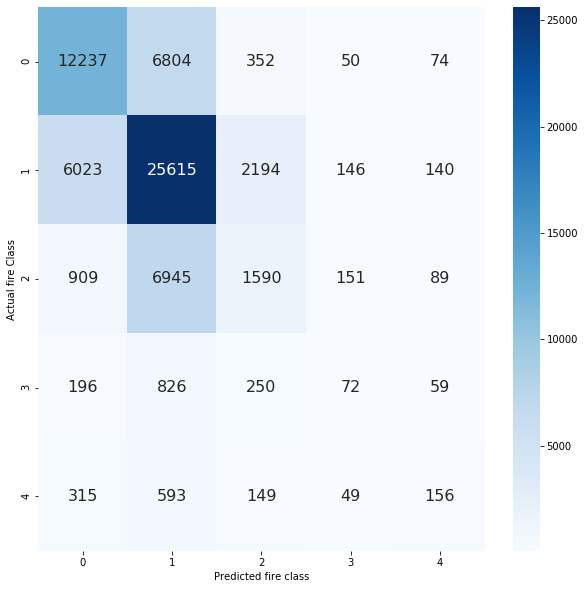

In [335]:
# Visualize it as a heatmap
fig, ax = plt.subplots(figsize=(10,10))
akws = {"ha": 'center',"va": 'center', "size": 16}
sn.heatmap(CMrf, fmt='', cmap=plt.cm.Blues, annot=True,annot_kws=akws, ax=ax,) 
plt.xlabel('Predicted fire class')
plt.ylabel('Actual fire Class')
plt.show()

In [336]:
#Step 2 Training the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb= gnb.fit(X_train, y_train)

In [337]:
y_predict=gnb.predict(X_test)
print(confusion_matrix(y_test,y_predict))
accuracy_score(y_test, y_predict)*100

[[ 3907  3881    16     0   582]
 [ 2196 11413   177     4   903]
 [  407  3233    72     0   328]
 [  110   349    18     0   121]
 [  167   179    11     0   205]]


55.1540012023056

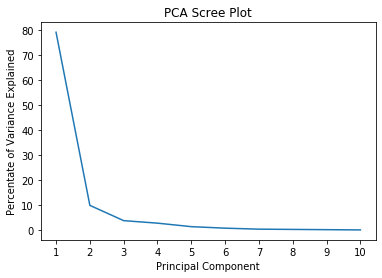

In [338]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =1)
plt.plot(range(1,11), percent_variance[:10])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks(range(1,11))
plt.show()

In [339]:
percent_variance

array([79.1, 10. ,  3.9,  2.9,  1.5,  0.9,  0.5,  0.4,  0.3,  0.2,  0.1,
        0.1,  0. ])

In [340]:
#Fitting the PCA algorithm with our Data
pca_v2=PCA(n_components=2) 
pca_v2 = pca_v2.fit(X_train)

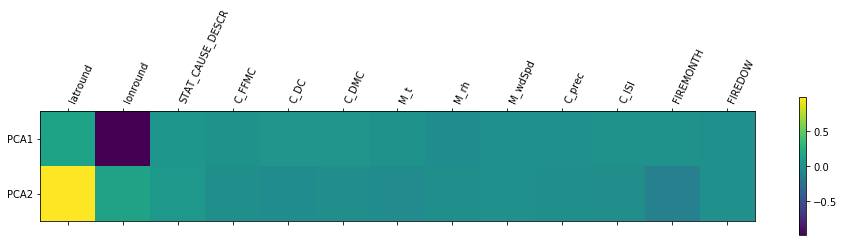

In [341]:
plt.matshow(pca_v2.components_,cmap='viridis')
plt.yticks([0,1],['PCA1','PCA2'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=65,ha='left')
plt.show()

In [342]:
firedata2=finaldata
numeric = ['C_FFMC', 'C_DMC', 'C_DC', 'M_t', 'M_rh',  'M_wdSpd','C_prec','C_ISI']  
scaler = StandardScaler()
x = firedata2[numeric].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=numeric, index = firedata2.index)
firedata2[numeric] = df_temp
firedata2.head()


,latround,lonround,FIRE_SIZE,STAT_CAUSE_DESCR,STATE,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI,Size_bin,FIREMONTH,FIREDOW
0,25.5,-80.67,20.0,Children,FL,-0.361201,-0.059067,-0.470423,-0.947182,1.343020,2.237352,-0.235184,-0.174926,10.0-99.9,Jan,Friday
1,25.5,-80.67,5.0,Missing/Undefined,FL,-0.356025,-0.051997,-0.461605,-1.458711,1.123583,1.337989,-0.273664,-0.423402,0.26-9.9,Jan,Saturday
2,25.5,-80.67,1.0,Equipment Use,FL,-0.288850,-0.032001,-0.439324,-0.299456,1.271743,0.789702,-0.273664,-0.493377,0.26-9.9,Jan,Monday
3,25.5,-80.67,0.4,Missing/Undefined,FL,-0.266764,-0.018903,-0.425589,-0.126858,1.308955,1.923439,-0.265389,-0.167025,0.26-9.9,Jan,Tuesday
4,25.5,-80.67,0.3,Missing/Undefined,FL,-0.261557,-0.005405,-0.414384,-0.038336,1.734917,-0.093289,-0.253926,-0.640104,0.26-9.9,Jan,Wednesday


In [343]:
#Label encoding of output variable
lbl = preprocessing.LabelEncoder()
firedata2['Size_bin']= lbl.fit_transform(firedata2['Size_bin']) 
firedata2.head()

,latround,lonround,FIRE_SIZE,STAT_CAUSE_DESCR,STATE,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI,Size_bin,FIREMONTH,FIREDOW
0,25.5,-80.67,20.0,Children,FL,-0.361201,-0.059067,-0.470423,-0.947182,1.343020,2.237352,-0.235184,-0.174926,2,Jan,Friday
1,25.5,-80.67,5.0,Missing/Undefined,FL,-0.356025,-0.051997,-0.461605,-1.458711,1.123583,1.337989,-0.273664,-0.423402,1,Jan,Saturday
2,25.5,-80.67,1.0,Equipment Use,FL,-0.288850,-0.032001,-0.439324,-0.299456,1.271743,0.789702,-0.273664,-0.493377,1,Jan,Monday
3,25.5,-80.67,0.4,Missing/Undefined,FL,-0.266764,-0.018903,-0.425589,-0.126858,1.308955,1.923439,-0.265389,-0.167025,1,Jan,Tuesday
4,25.5,-80.67,0.3,Missing/Undefined,FL,-0.261557,-0.005405,-0.414384,-0.038336,1.734917,-0.093289,-0.253926,-0.640104,1,Jan,Wednesday


In [344]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
#One hot encoding fire cause
X = onehotencoder.fit_transform(firedata2.STAT_CAUSE_DESCR.values.reshape(-1,1)).toarray()
feature_labels = onehotencoder.categories_
feature_labels = np.array(feature_labels).ravel()
X = pd.DataFrame(X, columns=feature_labels)
X.head()
firedata3 = pd.concat([firedata2, X], axis=1)


#One hot encoding fire month
X = onehotencoder.fit_transform(firedata2.FIREMONTH.values.reshape(-1,1)).toarray()
feature_labels = onehotencoder.categories_
feature_labels = np.array(feature_labels).ravel()
X = pd.DataFrame(X, columns=feature_labels)
X.head()
firedata3 = pd.concat([firedata3, X], axis=1)

#One hot encoding fire day of week
X = onehotencoder.fit_transform(firedata2.FIREDOW.values.reshape(-1,1)).toarray()
feature_labels = onehotencoder.categories_
feature_labels = np.array(feature_labels).ravel()
X = pd.DataFrame(X, columns=feature_labels)
X.head()
firedata3 = pd.concat([firedata3, X], axis=1)


firedata3=firedata3.drop(['STATE','STAT_CAUSE_DESCR', 'FIREMONTH','FIREDOW','FIRE_SIZE'], axis=1)


In [345]:
firedata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94263 entries, 0 to 94262
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latround           94263 non-null  float64
 1   lonround           94263 non-null  float64
 2   C_FFMC             94263 non-null  float64
 3   C_DC               94263 non-null  float64
 4   C_DMC              94263 non-null  float64
 5   M_t                94263 non-null  float64
 6   M_rh               94263 non-null  float64
 7   M_wdSpd            94263 non-null  float64
 8   C_prec             94263 non-null  float64
 9   C_ISI              94263 non-null  float64
 10  Size_bin           94263 non-null  int32  
 11  Arson              94263 non-null  float64
 12  Campfire           94263 non-null  float64
 13  Children           94263 non-null  float64
 14  Debris Burning     94263 non-null  float64
 15  Equipment Use      94263 non-null  float64
 16  Fireworks          942

In [347]:
#Using method 2 to split the data
from sklearn.model_selection import train_test_split
y1 = firedata3['Size_bin']
X1 = firedata3.drop(['Size_bin'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=52)


In [350]:
# SVM
from sklearn import svm
svmclf = svm.SVC(kernel='rbf', degree=3, gamma='auto')         

In [351]:
svmclf.fit(X_train1,y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [352]:
y_predict2 = svmclf.predict(X_test1)

In [355]:
CMsvm = confusion_matrix(y_test1, y_predict2)
print("Confusion Matrix: \n")
print(CMsvm)

Confusion Matrix: 

[[ 5110  3274     0     0     2]
 [ 2199 12479     0     0    15]
 [  338  3691     0     0    11]
 [   99   493     0     0     6]
 [  201   353     0     0     8]]


In [356]:
accuracy_score(y_test1, y_predict2)*100

62.22638707167864

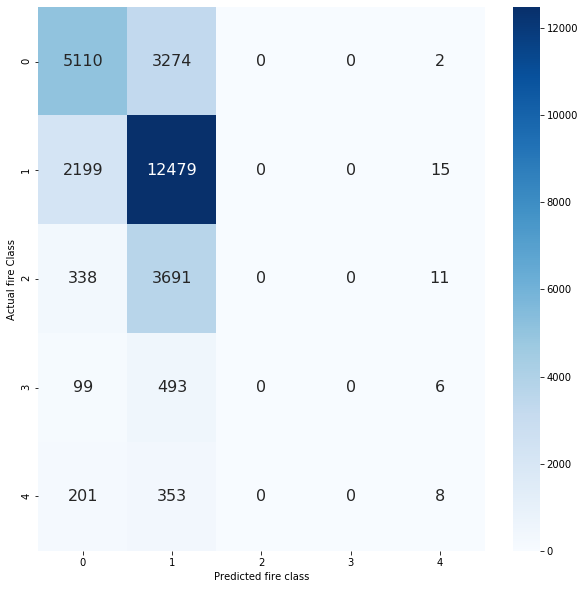

In [413]:
# Visualize it as a heatmap
fig, ax = plt.subplots(figsize=(10,10))
akws = {"ha": 'center',"va": 'center', "size": 16}
sn.heatmap(CMsvm, fmt='', cmap=plt.cm.Blues, annot=True,annot_kws=akws, ax=ax,) 
plt.xlabel('Predicted fire class')
plt.ylabel('Actual fire Class')
plt.show()

In [361]:
svmpoly = svm.SVC(kernel='poly',degree=3)
svmpoly.fit(X_train1,y_train1)
y_predict3 = svmpoly.predict(X_test1)

In [362]:
CMsvmpoly = confusion_matrix(y_test1, y_predict3)
print("Confusion Matrix: \n")
print(CMsvmpoly)

Confusion Matrix: 

[[ 3983  4403     0     0     0]
 [ 2275 12418     0     0     0]
 [  449  3591     0     0     0]
 [  142   456     0     0     0]
 [  238   324     0     0     0]]


In [363]:
accuracy_score(y_test1, y_predict3)*100

57.99710032179356

In [364]:
svmlinear = svm.SVC(kernel='linear',degree=3)
svmlinear.fit(X_train1,y_train1)
y_predict4 = svmlinear.predict(X_test1)

In [365]:
CMsvmlinear = confusion_matrix(y_test1, y_predict4)
print("Confusion Matrix: \n")
print(CMsvmlinear)

Confusion Matrix: 

[[ 3105  5281     0     0     0]
 [ 1831 12862     0     0     0]
 [  620  3420     0     0     0]
 [  171   427     0     0     0]
 [  273   289     0     0     0]]


In [366]:
accuracy_score(y_test1, y_predict4)*100

56.46239258813961

In [369]:
#Decision tree model with one hot encoded dataset
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model = model.fit(X_train1,y_train1)

In [370]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict5=model.predict(X_test1)
confusion_matrix(y_test1,y_predict5)
accuracy_score(y_test1, y_predict5)*100

54.050709006683405

In [372]:
#Implement cross validation
from sklearn.model_selection import cross_val_score
scores1  = cross_val_score(model, X_train1, y_train1, cv=10, scoring="accuracy")
y_predict6 = cross_val_predict(model, X_train1, y_train1, cv=10)

print(scores1)
print("\nAccuracy: %0.2f (std %0.2f)" % (scores1.mean(), scores1.std()))

CM = confusion_matrix(y_train1, y_predict6)
print("Confusion Matrix: \n")
print(CM)

[0.53174723 0.54068798 0.54493105 0.53841491 0.51788421 0.55259169
 0.52576538 0.53576841 0.52985753 0.54410427]

Accuracy: 0.54 (std 0.01)
Confusion Matrix: 

[[11700  6401  1048   174   194]
 [ 7340 20882  4929   571   396]
 [ 1246  5457  2449   333   199]
 [  215   641   336   122    89]
 [  279   451   237   102   193]]


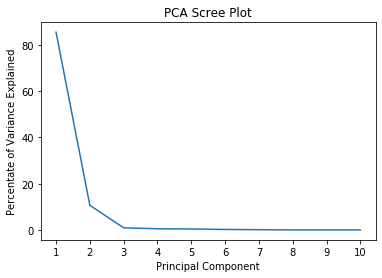

In [373]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train1)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =1)
plt.plot(range(1,11), percent_variance[:10])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks(range(1,11))
plt.show()

In [374]:
percent_variance

array([85.4, 10.7,  1. ,  0.6,  0.5,  0.3,  0.2,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [375]:
#Fitting the PCA algorithm with our Data
pca_v3=PCA(n_components=2) 
pca_v3 = pca_v3.fit(X_train1)

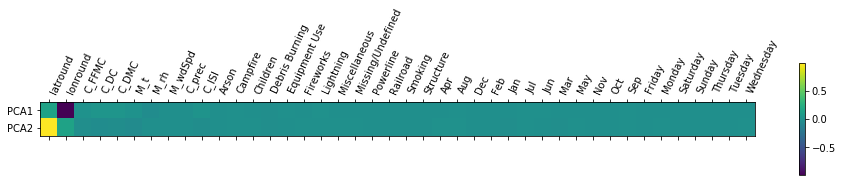

In [376]:
plt.matshow(pca_v3.components_,cmap='viridis')
plt.yticks([0,1],['PCA1','PCA2'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_train1.columns)),X_train1.columns,rotation=65,ha='left')
plt.show()

In [399]:
input_file = "C:/Users/prc0549/Documents/MS Analytics/ANLY 699/Data project/Datafinal.csv" 
finaldata3 = pd.read_csv(input_file)

In [400]:
finaldata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94263 entries, 0 to 94262
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latround          94263 non-null  float64
 1   lonround          94263 non-null  float64
 2   FIRE_SIZE         94263 non-null  float64
 3   STAT_CAUSE_DESCR  94263 non-null  object 
 4   STATE             94263 non-null  object 
 5   C_FFMC            94263 non-null  float64
 6   C_DC              94263 non-null  float64
 7   C_DMC             94263 non-null  float64
 8   M_t               94263 non-null  float64
 9   M_rh              94263 non-null  float64
 10  M_wdSpd           94263 non-null  float64
 11  C_prec            94263 non-null  float64
 12  C_ISI             94263 non-null  float64
 13  Size_bin          94263 non-null  object 
 14  FIREMONTH         94263 non-null  object 
 15  FIREDOW           94263 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [401]:
finaldata3.describe()

,latround,lonround,FIRE_SIZE,C_FFMC,C_DC,C_DMC,M_t,M_rh,M_wdSpd,C_prec,C_ISI
count,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,94263.000000,9.426300e+04,9.426300e+04
mean,36.238227,-95.986424,100.037091,88.495085,299.530246,76.840284,25.407976,37.820333,10.986897,7.750812e-01,9.976701e+00
std,5.471606,14.184135,2977.660201,9.227274,312.857524,105.865439,7.866449,18.402139,7.131908,2.832254e+00,9.148738e+00
min,25.500000,-124.670000,0.000200,3.760347,0.195785,0.019820,1.873193,0.685971,0.052316,-1.247548e-14,4.513861e-08
25%,32.000000,-107.330000,0.200000,86.576370,51.734310,18.241415,19.385580,23.755875,5.910426,0.000000e+00,4.358532e+00
50%,34.500000,-94.000000,1.000000,90.079610,210.646300,39.734500,25.552550,35.612110,9.286214,0.000000e+00,7.315162e+00
75%,40.500000,-84.000000,5.000000,93.894375,451.766700,89.847340,31.479970,49.331080,14.200800,2.155044e-01,1.299556e+01
max,49.000000,-67.330000,479549.000000,100.552000,2799.314000,1189.231000,49.666740,99.084690,53.923800,1.021282e+02,1.080923e+02


In [402]:
#Label encoding of categorical variables
cols = ['STAT_CAUSE_DESCR', 'Size_bin', 'FIREMONTH','FIREDOW']
for col in cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(finaldata3[col].values.astype('str')))
    finaldata3[col] = lbl.transform(list(finaldata3[col].values.astype('str')))
finaldata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94263 entries, 0 to 94262
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latround          94263 non-null  float64
 1   lonround          94263 non-null  float64
 2   FIRE_SIZE         94263 non-null  float64
 3   STAT_CAUSE_DESCR  94263 non-null  int64  
 4   STATE             94263 non-null  object 
 5   C_FFMC            94263 non-null  float64
 6   C_DC              94263 non-null  float64
 7   C_DMC             94263 non-null  float64
 8   M_t               94263 non-null  float64
 9   M_rh              94263 non-null  float64
 10  M_wdSpd           94263 non-null  float64
 11  C_prec            94263 non-null  float64
 12  C_ISI             94263 non-null  float64
 13  Size_bin          94263 non-null  int64  
 14  FIREMONTH         94263 non-null  int64  
 15  FIREDOW           94263 non-null  int64  
dtypes: float64(11), int64(4), object(1)
memo

In [403]:
#Using method 2 to split the data
from sklearn.model_selection import train_test_split
y4 = finaldata3['Size_bin']
X4 = finaldata3.drop(['Size_bin','FIRE_SIZE','STATE'],axis=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=52)

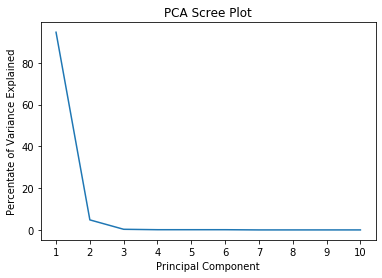

In [404]:
from sklearn.decomposition import PCA
pca4 = PCA().fit(X_train4)
percent_variance = np.round(pca4.explained_variance_ratio_* 100, decimals =1)
plt.plot(range(1,11), percent_variance[:10])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks(range(1,11))
plt.show()

In [405]:
percent_variance

array([94.6,  4.8,  0.3,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ])

In [406]:
#Fitting the PCA algorithm with our Data
pca_v3=PCA(n_components=2) 
pca_v3 = pca_v3.fit(X_train4)

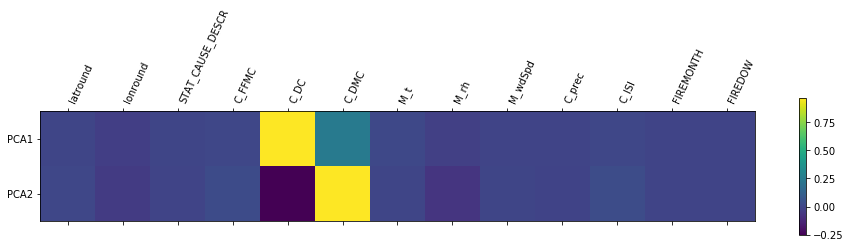

In [407]:
plt.matshow(pca_v3.components_,cmap='viridis')
plt.yticks([0,1],['PCA1','PCA2'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_train4.columns)),X_train4.columns,rotation=65,ha='left')
plt.show()

In [408]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() 
clf.fit(X_train1, y_train1) 
y_predict5 = clf.predict(X_test1) 
print(confusion_matrix(y_test1, y_predict5)) 
print(accuracy_score(y_test1, y_predict5)*100)

[[ 5238  2981   129    16    22]
 [ 2413 11208   949    64    59]
 [  351  2907   673    58    51]
 [   78   348   108    25    39]
 [  141   243    66    30    82]]
60.914459492909934


In [409]:
#Calculating the feature importance in Python
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
lonround,0.114544
latround,0.097230
C_DC,0.086473
C_DMC,0.083768
M_t,0.080626
M_wdSpd,0.078755
M_rh,0.078651
C_ISI,0.078249
C_FFMC,0.076687
C_prec,0.040629


In [410]:
os.getcwd()

'C:\\Users\\prc0549'